# Assignment 1 - ML Data Cleaning & Feature Selection

# About Dataset

### Context

This dataset is originally from UCI Machine Learning Repository. The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset.
The datasets consists of several medical predictor variables and one target variable, Class(renamed to ChronicKidneyDisease). 

#### Predictor variables includes
BloodPressure(Bp),Albumin(Al),SpecificGravity,Albumin,Sugar,SerumCreatinine,BloodUrea,Sodium,Pottasium,Hemoglobin,RedBloodCellsCont,WhiteBloodCellsCont,Hypertension .

# Column Description for our Dataset


##### Kaggle Dataset Link: https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

### Target Variable/Dependent Variable

__ChronicKidneyDisease__ -  Is the person suffering from chronic Kidney Disease. This is the variable we have to predict
Predictor Variables/Independent Variables


### Predictor Variables/Independent Variables

1. __Blood Pressure__ - A condition in which the force of the blood against the artery walls is too high.
2. __SpecificGravity__ - specific gravity, also called relative density, ratio of the density of a substance to that of a standard   substance.
3. __Albumin__-Albumin is a protein made by the liver. A albumin test measures the amount of this protein in the clear liquid       portion of the blood.
4. __Sugar__- A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126      mg/dL or higher indicates you have diabetes.
5. __RedBloodCell__- The results of RBC indices are used to diagnose different types of anemia.
6. __BloodUrea__ - The blood urea test measures how much urea nitrogen is in your blood.
7. __SerumCreatinine__ -A measurement of creatinine in your blood or urine provides clues to help your doctor determine how well the    kidneys are working.
8. __Sodium__-It helps maintain normal blood pressure, supports the work of your nerves and muscles, and regulates your body's fluid    balance. A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).
9. __Pottasium__- Potassium is a chemical that is critical to the function of nerve and muscle cells, including those in your heart. Blood potassium level is normally 3.6 to 5.2 millimoles per liter (mmol/L)
10. __Hemoglobin__- Hemoglobin is a protein in red blood cells that carries oxygen.Normal results for adults vary, but in general       are:Male: 13.8 to 17.2 grams per deciliter (g/dL) or 138 to 172 grams per liter (g/L)
    Female: 12.1 to 15.1 g/dL or 121 to 151 g/L.
11. __WhiteBloodCellsCont__- The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L). 
12. __RedBloodCellsCont__- A normal RBC count would be around: men – 4.0 to 5.9 x 10*12/L. women – 3.8 to 5.2 x 10*12/L.
13. __Hypertension__- Having blood pressure measures consistently above normal may result in a diagnosis of  hypertension.

In [10]:
#installing dependencies
!pip install eli5

eli5 is a Python library that helps to debug and explain machine learning models. It provides various tools to inspect and understand the behavior of individual predictions and feature importances.

In [11]:
#loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
file_url = "https://raw.githubusercontent.com/Akshathapatil1998/ML_Data_Cleaning_and_Feature_Selection_Chronic_Kidney_Disease_Prediction/main/new_model.csv"
data = pd.read_csv(file_url)

This code imports the pandas library and then uses the pd.read_csv() function to read in the contents of a CSV file located at the github(my repository).The read_csv() is a function in pandas library that is used to read a CSV file and create a dataframe from it

In [13]:
##Reading first 5 rows
data.head(5)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [14]:
#Renaming columns 
data = data.rename(columns={"Bp":"BloodPressure","Sg":"SpecificGravity","Al":"Albumin","Su":"Sugar","Rbc":"RedBloodCell","Bu":"BloodUrea","Sc":"SerumCreatinine","Sod":"Sodium","Pot":"Pottasium","Hemo":"Hemoglobin","Wbcc":"WhiteBloodCellsCont","Rbcc":"RedBloodCellsCont","Htn":"Hypertension","Class":"ChronicKidneyDisease"})

In [15]:
data.describe()

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [8]:
###Reading first 5 rows after renaming
data.head(5)

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


Text(0, 0.5, 'Chronic Kidney Disease')

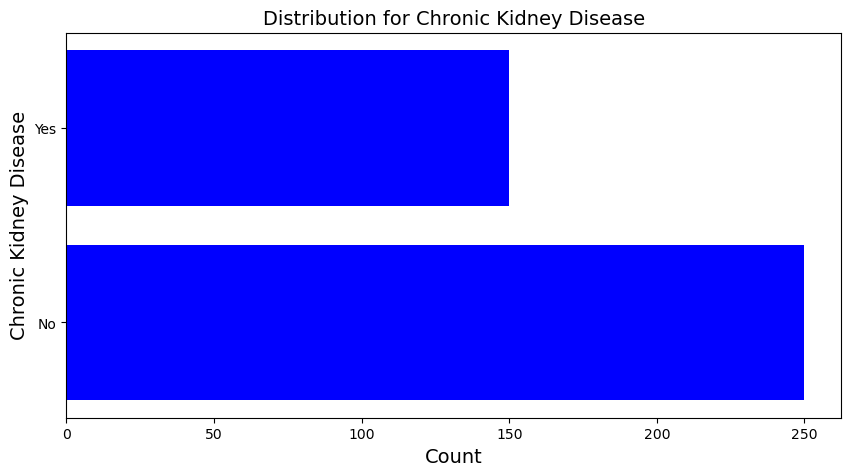

In [9]:
#Checking if ChronicKidney Diseases has 1 and 0 only(binary)
data['ChronicKidneyDisease'].value_counts()
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],data['ChronicKidneyDisease'].value_counts(), color ="#0000ff")
plt.title('Distribution for Chronic Kidney Disease', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("Chronic Kidney Disease", size =14)

### Observations:

ChronicKidneyDisease has only binary data so we are assuming that '1' means that the person has a chronic Kidney Disease and '0' means the person is free of any chronic disease.

In [327]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

In [328]:
#Converting ChronicKidneyDiseases to a Yes/No field  for our Analysis
data['ChronicKidneyDisease'] = data['ChronicKidneyDisease'].apply(convert_binary_to_yesno)


In [329]:
###Reading first 5 rows after renaming the columns
data.head(5)

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,Yes
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,Yes
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,Yes
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,Yes
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,Yes


### Observations:
Now the chronicKidney disease column has caterogical values yes/no

# What are the data types?

In [330]:
#Getting the list of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [331]:
#Getting the list of numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

In [332]:
#Printing the list of categorical and numerical columns
print("--------------------------------------------------------")
print("                 Categorical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("--------------------------------------------------------")
print("                 Numerical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')

--------------------------------------------------------
                 Categorical Variables                  
--------------------------------------------------------
Total number of categorical variables in our dataset: 1
1. ChronicKidneyDisease


--------------------------------------------------------
                 Numerical Variables                  
--------------------------------------------------------
Total number of numerical variables in our dataset: 13
1. BloodPressure
2. SpecificGravity
3. Albumin
4. Sugar
5. RedBloodCell
6. BloodUrea
7. SerumCreatinine
8. Sodium
9. Pottasium
10. Hemoglobin
11. WhiteBloodCellsCont
12. RedBloodCellsCont
13. Hypertension


# Are there missing values? # Which independent variable have missing data? How much? 

In [333]:
#Checking missing values in our data
data.isnull().sum()

BloodPressure           0
SpecificGravity         0
Albumin                 0
Sugar                   0
RedBloodCell            0
BloodUrea               0
SerumCreatinine         0
Sodium                  0
Pottasium               0
Hemoglobin              0
WhiteBloodCellsCont     0
RedBloodCellsCont       0
Hypertension            0
ChronicKidneyDisease    0
dtype: int64

### Observations:

We have 0% missing values both in our independent variables as well as dependent variable

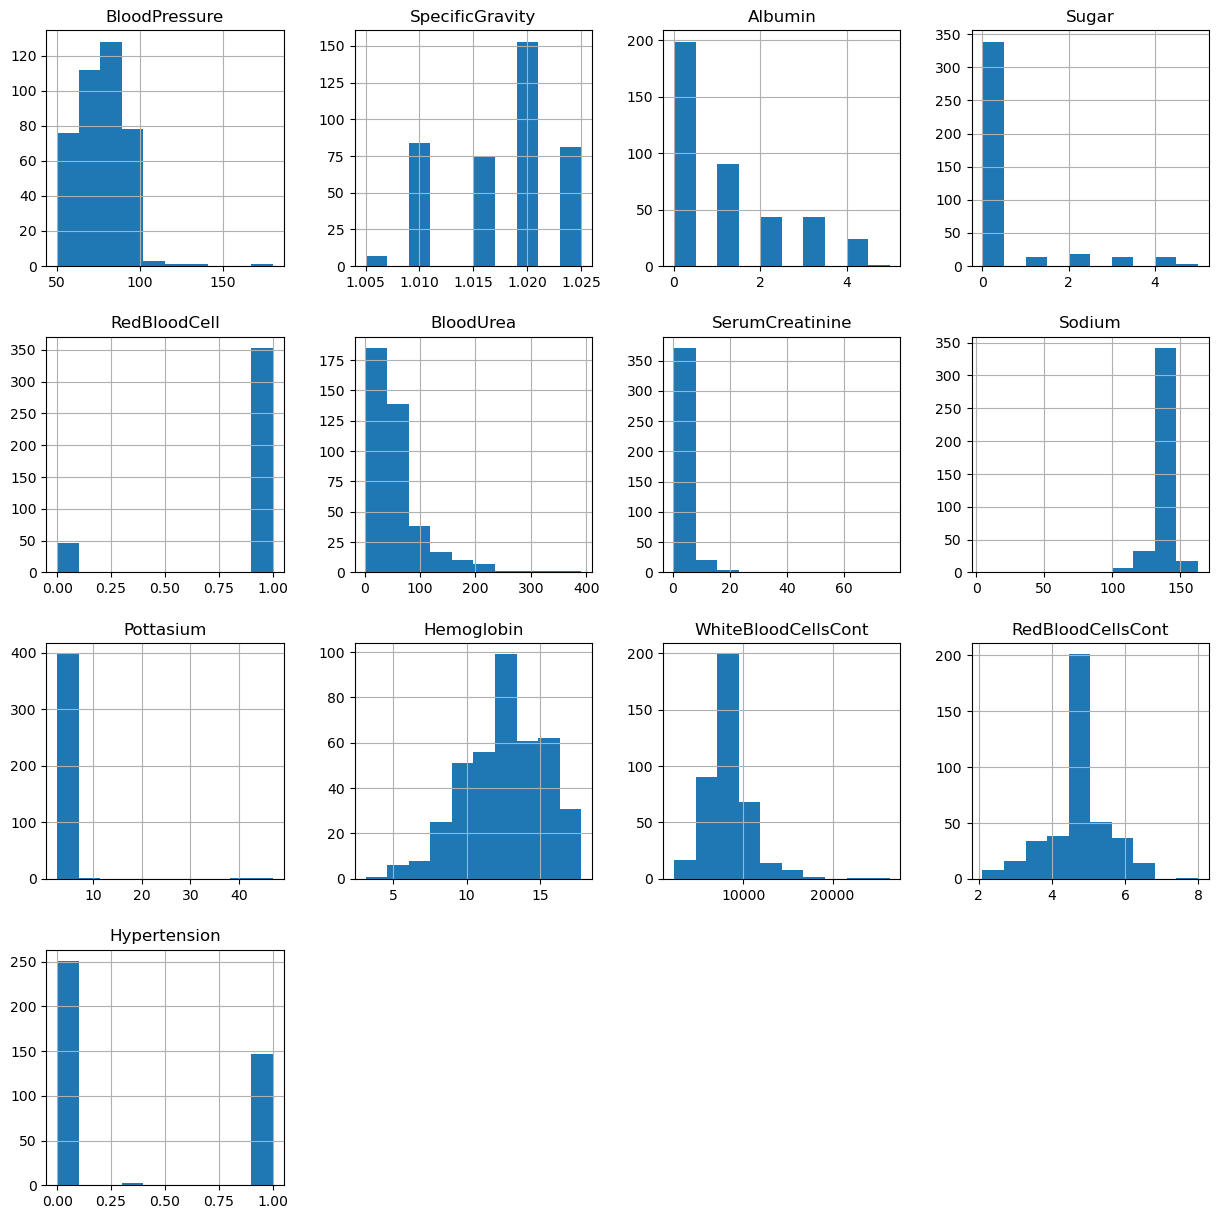

In [334]:
#generating histograms
plot = data.hist(figsize=(15,15))

Here I'm plotting histograms for each numerical column in the dataframe. The hist() function in pandas is used to generate histograms for all numerical columns in a dataframe for our analysis

In [335]:
#Dropping dependent valirable from dataframe to obtain the distributions of independent variables
datafinal = data.drop('ChronicKidneyDisease', axis=1)


# What are the distributions of the predictor variables?   

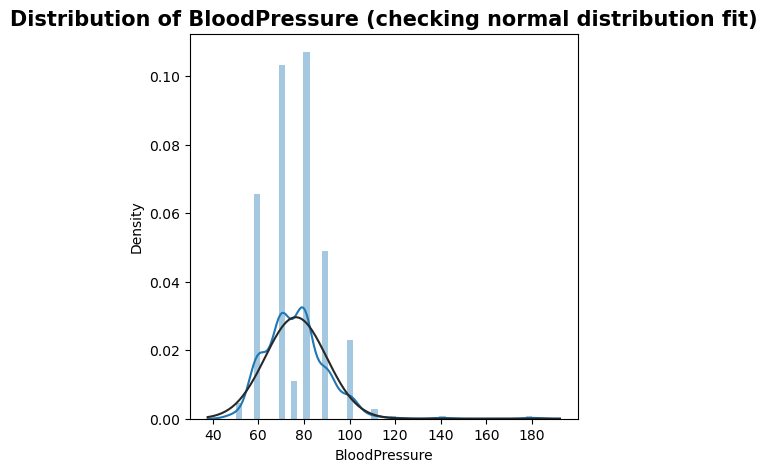

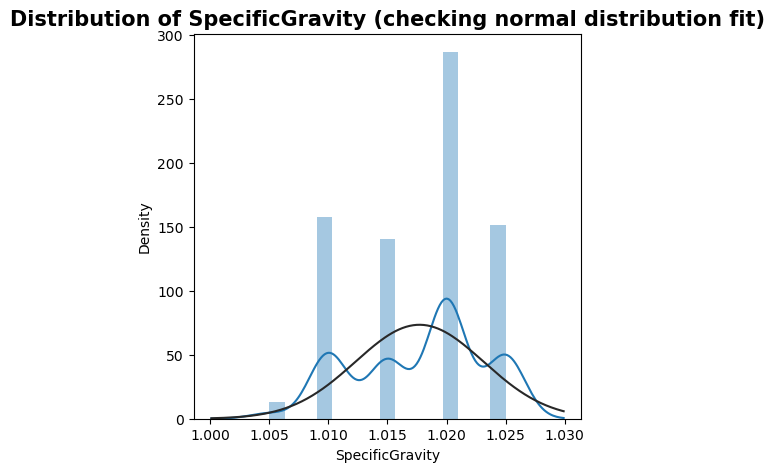

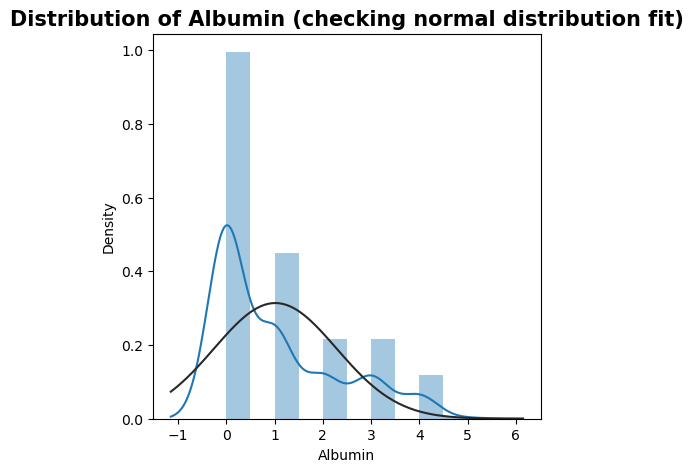

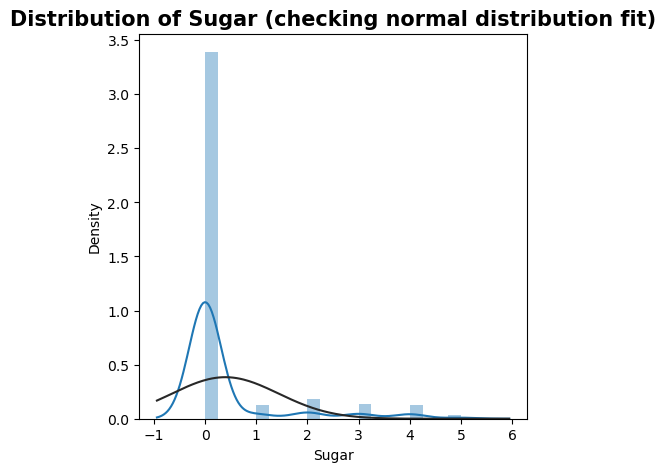

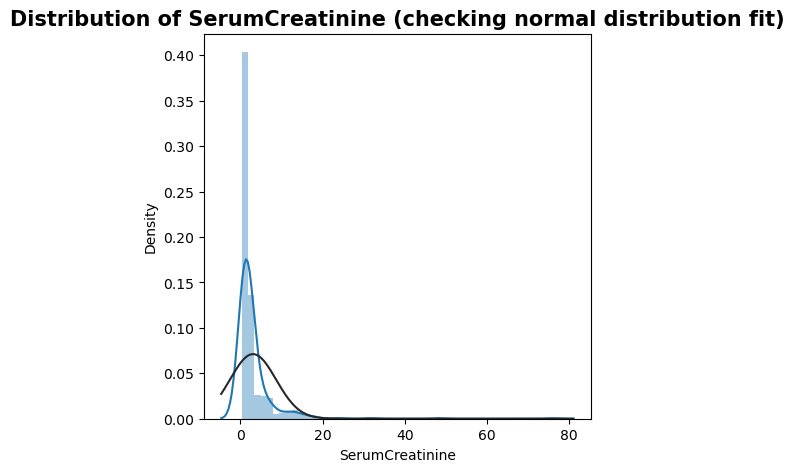

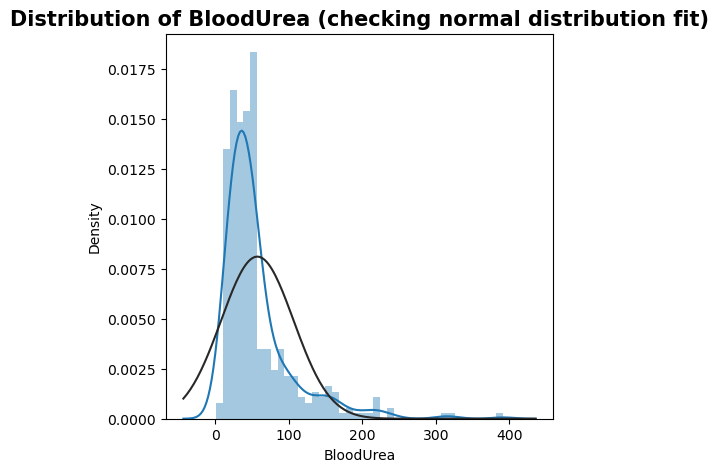

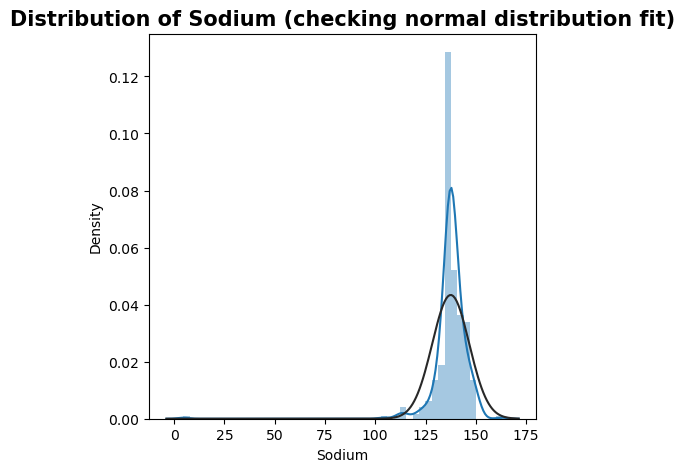

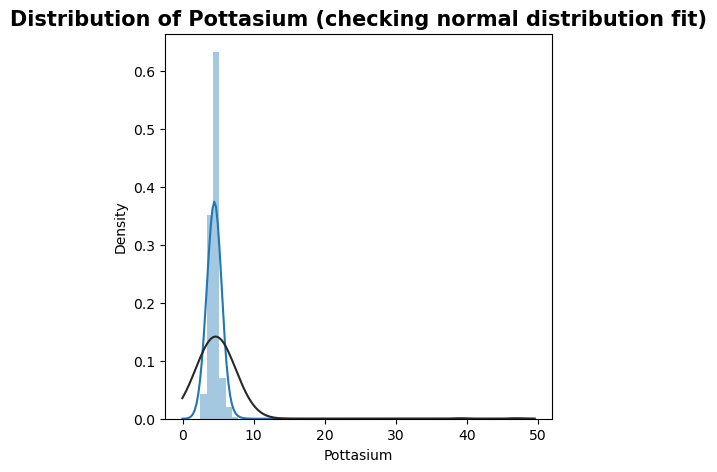

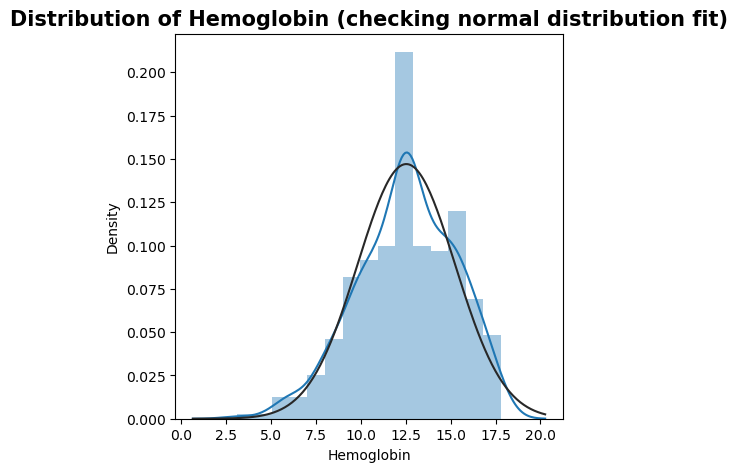

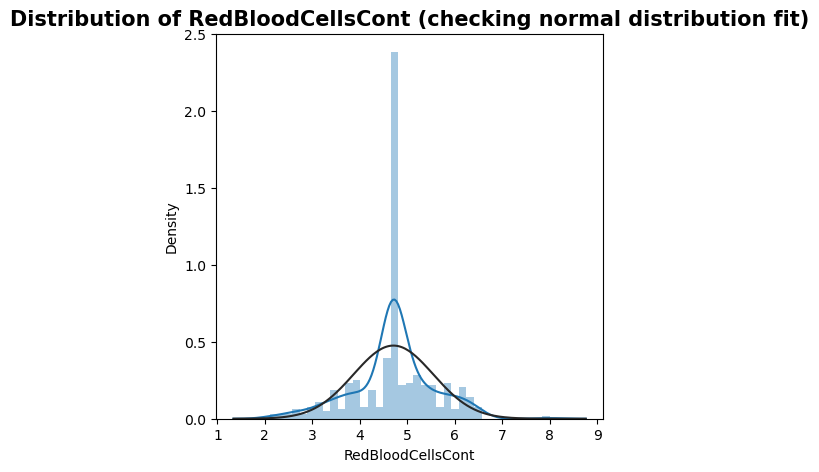

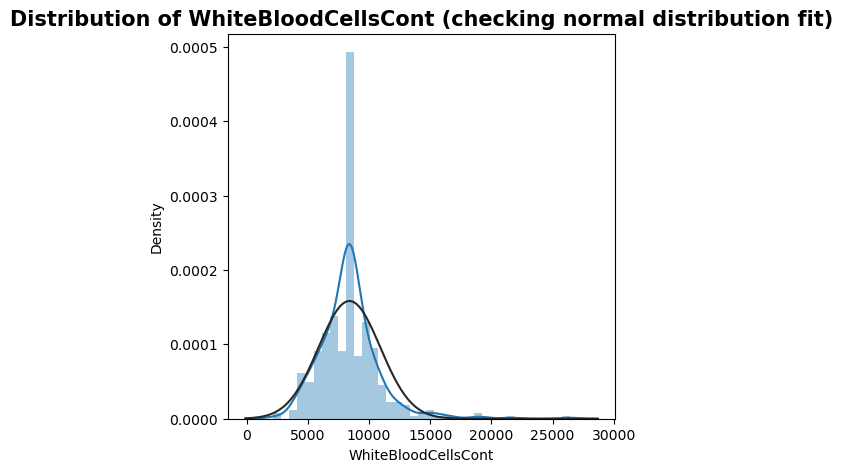

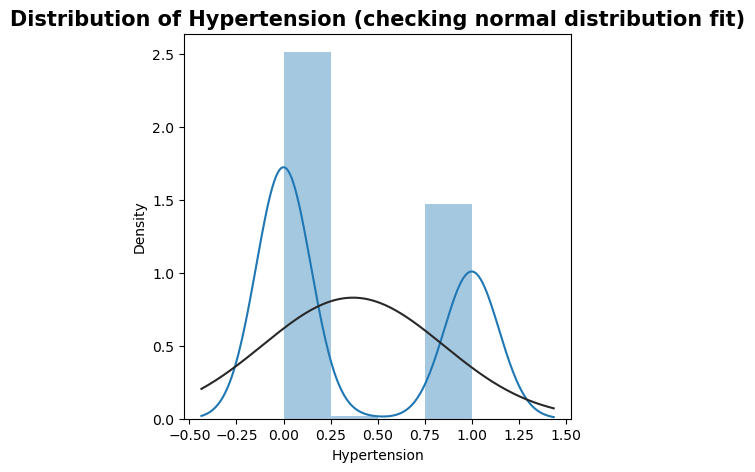

In [336]:
#checking the distribution of independent(predictor) variables
datalist= ['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']
 
for i in datalist:
    from scipy import stats
    plt.figure(figsize= (5,5))
    sns.distplot(data[i], fit = stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",size = 15, weight = "bold")

The code is also trying to fit a normal distribution to each column's data by passing the __stats.norm()__ function as an argument to the fit parameter in __distplot()__. This is useful for checking if the data is following a normal distribution, which is a useful assumption for some models, such as linear regression.

### Observations from graphs:

__BloodPressure__ : nomral distribution

__SpecificGravity__: almost normal distribution with a bit of left-skewness

__Albumin__: almost normal distribution with a bit of right-skewness

__SerumCreatinine__ : almost normal distribution with a bit of left-skewness

__BloodUrea__ : almost normal distribution with a bit of right-skewness

__Sodium__ : nomral distribution with a bit of edge-peak

__Potassium__ : almost normal distribution with a bit of right-skewness

__Hemoglobin__: normal distribution

__WhiteBloodCellConncentration__ : almost normal distribution with a bit of right-skewness

__RedBloodCellConcentration__ : normal distribution



# What are the likely distributions of the numeric variables?

The mean of BP is  76.45
The median of BP is  78.0
The Mode of BP is  0    80.0
Name: BloodPressure, dtype: float64


Text(0.5, 1.0, 'Distribution curve for Blood Pressure')

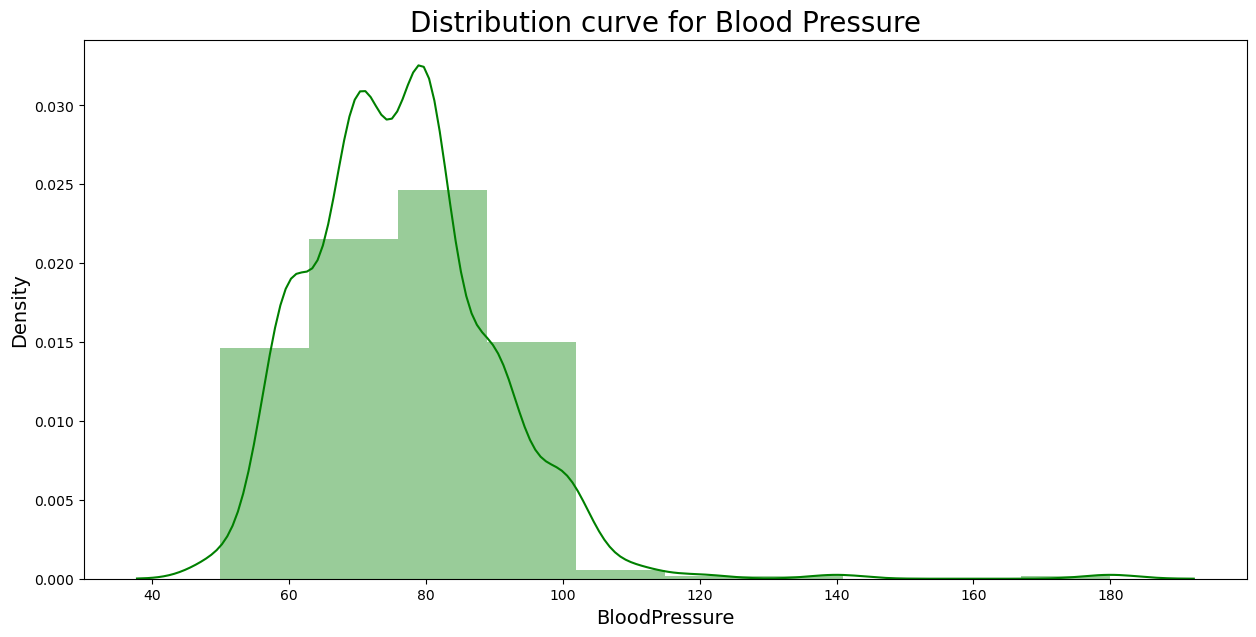

In [337]:
plt.figure(figsize=(15,7))
sns.distplot(data['BloodPressure'], bins=10, color = "green")
print("The mean of BP is ",round(data['BloodPressure'].mean(),2))
print("The median of BP is ",data['BloodPressure'].median())
print("The Mode of BP is ",data['BloodPressure'].mode())
plt.xlabel("BloodPressure", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Blood Pressure', size=20)

### Observations
1. The mean and median are almost similar
2. The density of people with BP 80 is the highest
3. The age range lies between 45 - 118mm Hg

The mean of Hemoglobin is  12.53
The median of Hemoglobin is  12.53
The Mode of Hemoglobin is  0    12.53
Name: Hemoglobin, dtype: float64


Text(0.5, 1.0, 'Distribution curve for Hemoglobin')

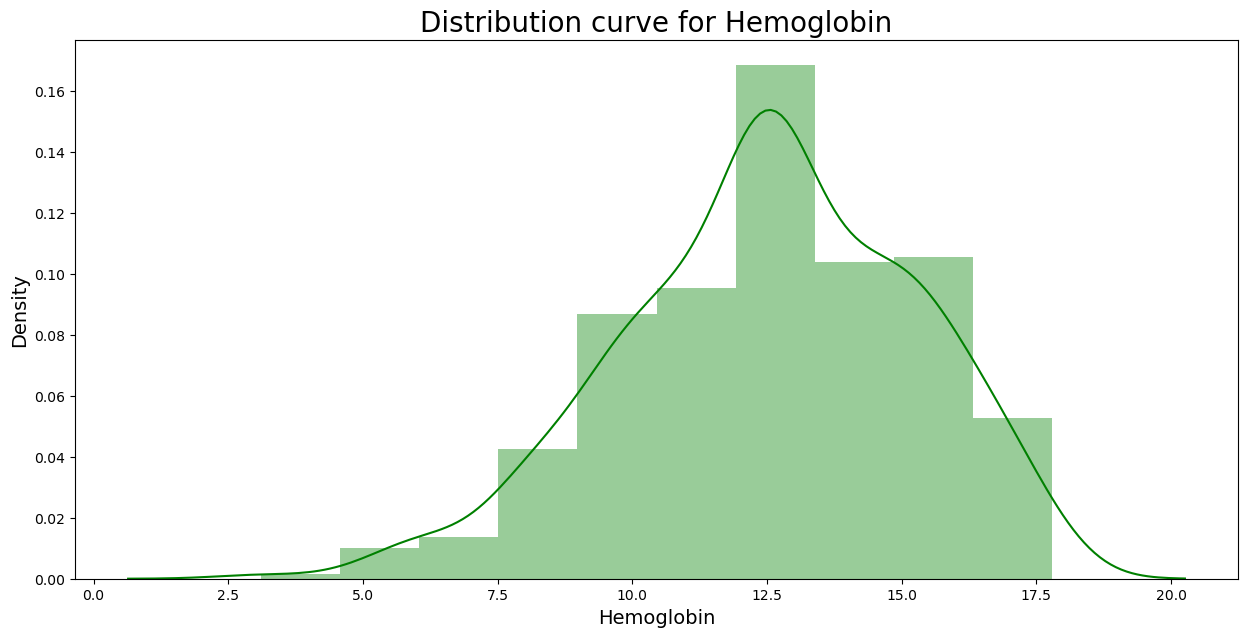

In [338]:
plt.figure(figsize=(15,7))
sns.distplot(data['Hemoglobin'], bins=10, color = "green")
print("The mean of Hemoglobin is ",round(data['Hemoglobin'].mean(),2))
print("The median of Hemoglobin is ",data['Hemoglobin'].median())
print("The Mode of Hemoglobin is ",data['Hemoglobin'].mode())
plt.xlabel("Hemoglobin", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Hemoglobin', size=20)

### Observations:
1. As per the graph the Hemoglobin follows normal distribution
2. Here also the mean,mode and median are same

Before we move further, we need to do some data cleaning for our analysis and also for building the model.

We will covert 'Yes/No' to 1/0 ChronicKidneyDisease

In [339]:
#function for coverting yes/no to binary

def convert_yesno_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [340]:
data['ChronicKidneyDisease'] = data['ChronicKidneyDisease'].apply(convert_yesno_to_binary)

# Do the range of the predictor variables make sense?

<AxesSubplot:>

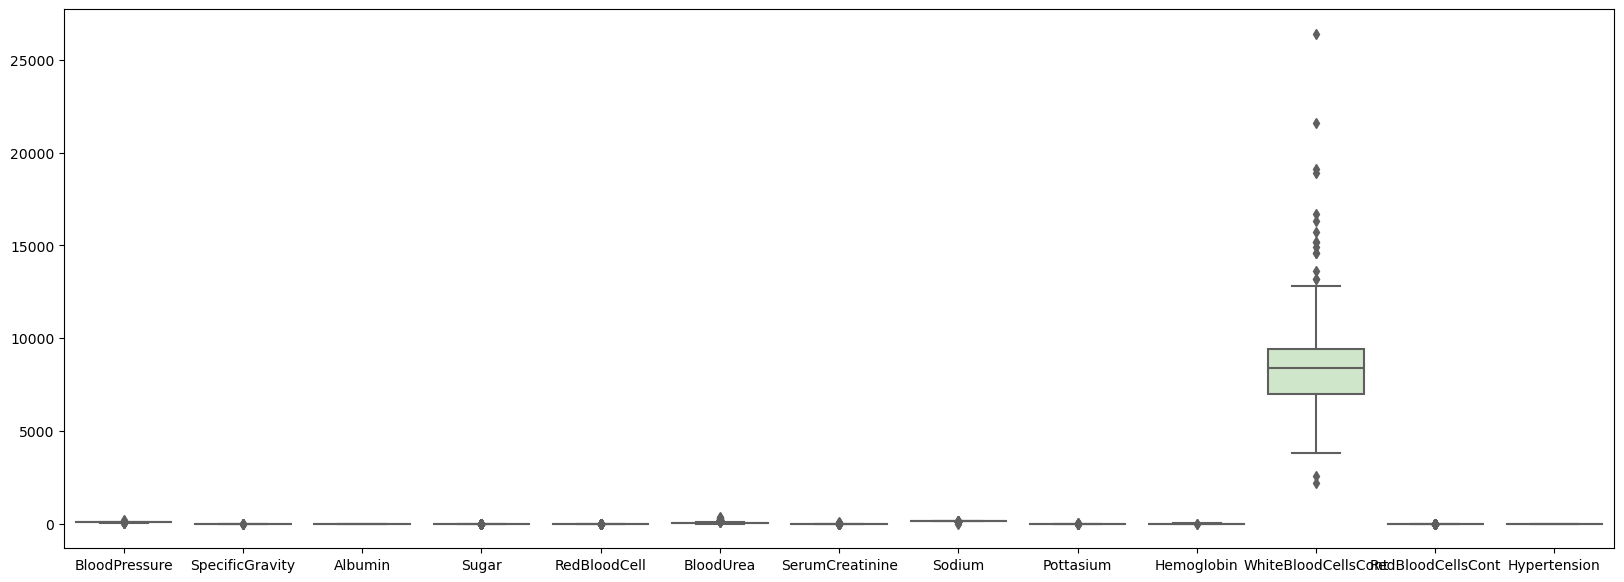

In [341]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal, palette="Set3")



### Observations:

The range of WhiteBloodCells is way too high and is dominating as compared to other predictor variables.Because of which it is suppressing other valiables Therefore, we are not able to visualize the ranges for other predictor variables. Hence we perform normalisation



So what should be do next to visualize ranges of other predictor variables?

We will plot the charts separately to get the ranges of each one of them

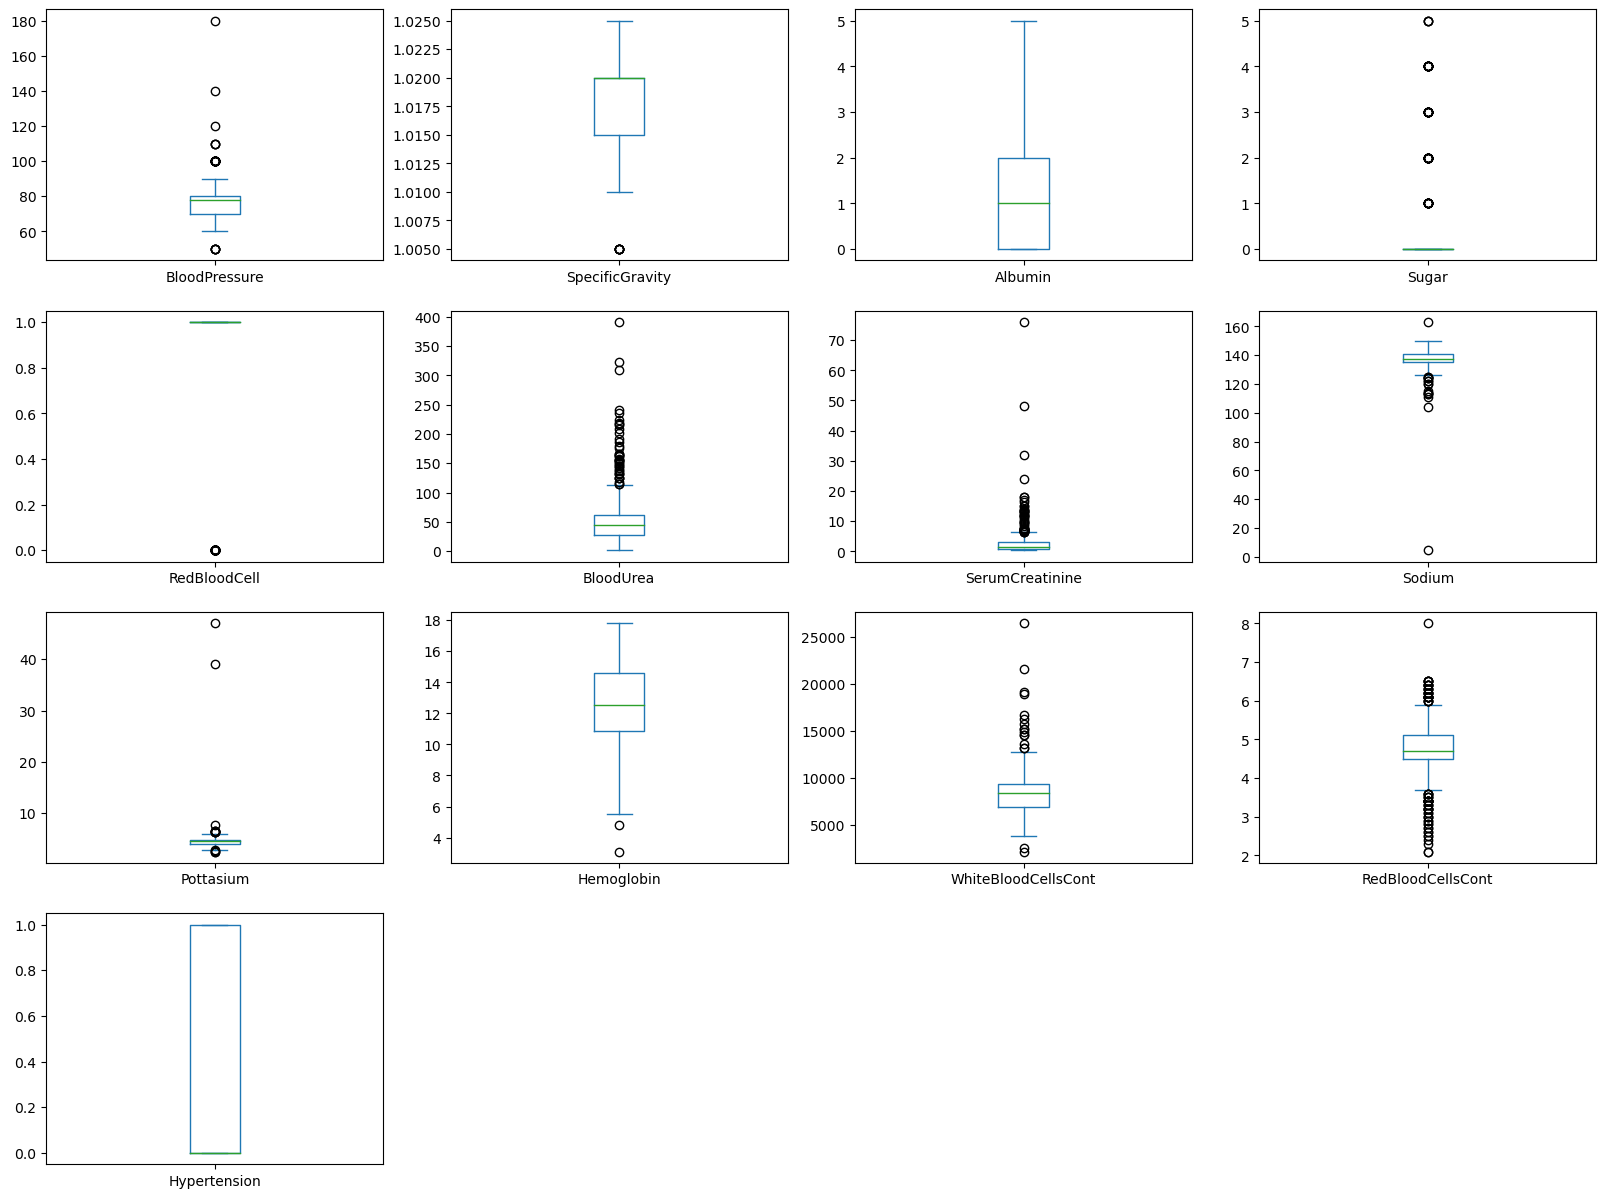

In [342]:
import matplotlib.pyplot as plt

# Create box plots for all numeric variables
datafinal.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()


### Observations:
It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.
Normalizing the dataset
We need to scale our numerical columns. Although we can use any scaling technique, we will be using normalization as we want to have values in the range of [0,1] and also to detect outliers as normalization is highly affected my outliers

## Normalization 

In [343]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = datafinal[['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
datafinal[['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']] = pd.DataFrame(x_scaled)

In [344]:
#data after noromalizing and feature creation
datafinal.describe()

,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.203500,0.635625,0.203000,0.079000,0.882500,0.143531,0.035349,0.839300,0.047817,0.641286,0.256450,0.442081,0.369350
std,0.103666,0.271701,0.254466,0.208008,0.322418,0.126537,0.074305,0.058071,0.063366,0.184774,0.104265,0.142426,0.482023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.500000,0.000000,0.000000,1.000000,0.065469,0.006614,0.823344,0.033708,0.528912,0.197314,0.406780,0.000000
50%,0.215385,0.750000,0.200000,0.000000,1.000000,0.109114,0.013228,0.839306,0.047865,0.641497,0.256446,0.442373,0.000000
75%,0.230769,0.750000,0.400000,0.000000,1.000000,0.154685,0.035317,0.861199,0.051685,0.784014,0.297521,0.508475,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations:

We can see that the numerical variables - BloodPressure,Albumin,BloodUrea,Sodium,Potassium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont are now in the range of 0 to 1

<AxesSubplot:>

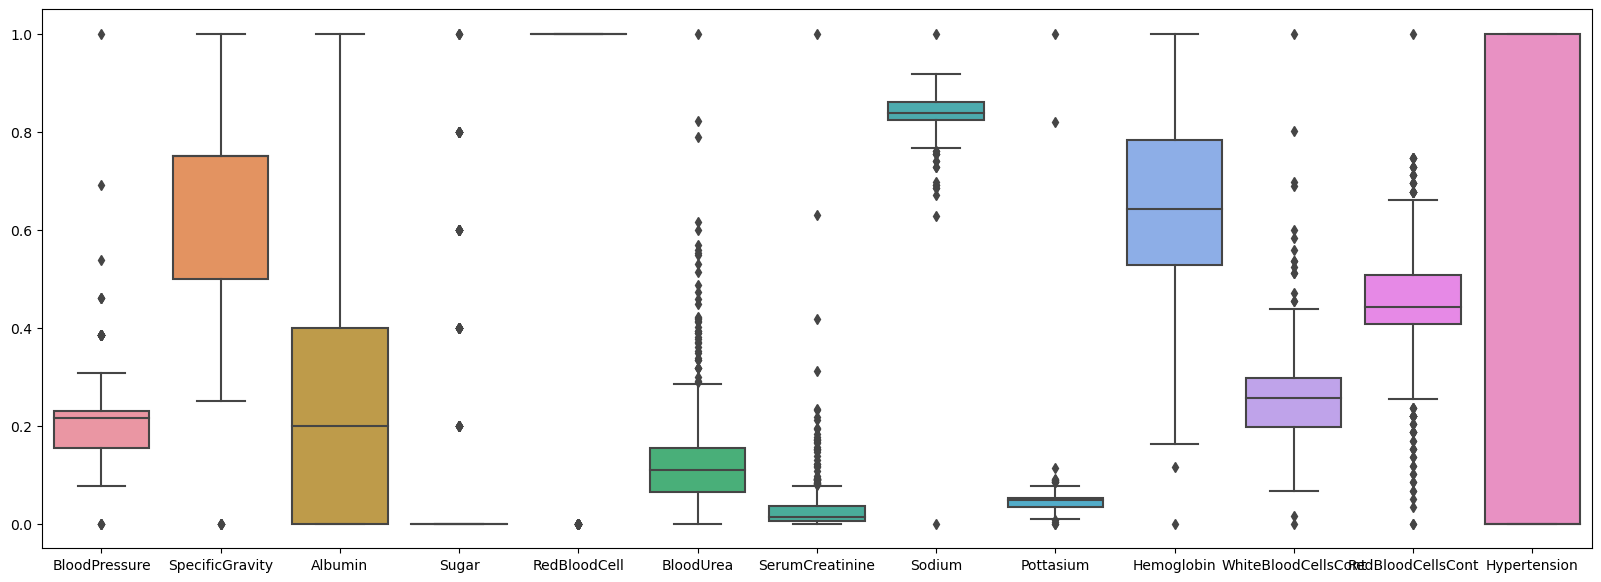

In [345]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal)

### Observations:
Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

1.Blood Pressure,BloodUrea,Serum Creatanine,Sodium,Potassium,WBCCont,RBCCont has outliers which means that their concentration level in body do not impact much in identifying the chronic kidney disease.

2.Sugar levels indicate errors or unusual observations.

# Are the predictor variables independent of all other predictor variables?

In [346]:
#checking the correlation between all the features in the data
datafinal.corr()


,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension
BloodPressure,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,-0.279441,0.025963,-0.220827,0.268003
SpecificGravity,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,0.492103,-0.206880,0.443437,-0.318956
Albumin,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,-0.548681,0.200664,-0.454131,0.478309
Sugar,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,-0.156875,0.159033,-0.163825,0.253179
RedBloodCell,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,0.280991,-0.002205,0.202298,-0.139342
BloodUrea,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,-0.540699,0.041530,-0.465947,0.387503
SerumCreatinine,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.342053,-0.005420,-0.323056,0.273904
Sodium,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.333604,0.006334,0.316883,-0.306501
Pottasium,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.100612,-0.074057,-0.120418,0.057028
Hemoglobin,-0.279441,0.492103,-0.548681,-0.156875,0.280991,-0.540699,-0.342053,0.333604,-0.100612,1.000000,-0.153806,0.681864,-0.576932


### Observations:

At first glance we can see that that the variables have very less collinearity. To visualize the values lets check the heatmap next

<AxesSubplot:>

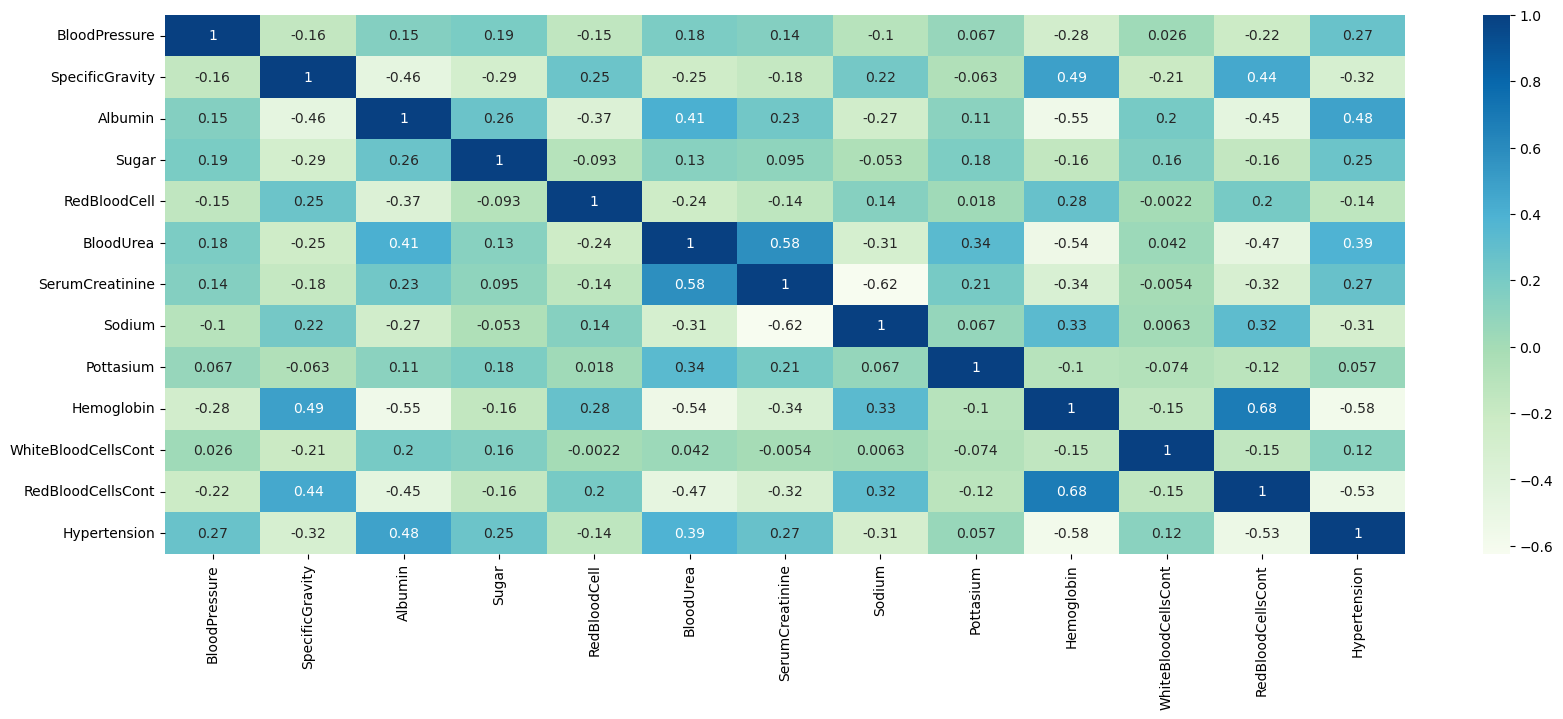

In [347]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(datafinal.corr(), annot=True, cmap='GnBu')


### Observations:
1. From the plots, we do not have much high correlation between features.
2. Red Blood Cell concentration and Hemoglobin are highly coorelated
3. Serum Creatinine and Blood urea has the coorelation value of 0.58

In [1]:
#pair plot to check the colinearity
sns.pairplot(datafinal) 
plt.show()


NameError: name 'sns' is not defined

# Which independent variables are useful to predict a target (dependent variable)?


## Method 1: Using OLS for finding the p value to check the significant features

In [1]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['ChronicKidneyDisease'], data[['BloodPressure','SpecificGravity','Albumin','RedBloodCell','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']]).fit()

model.summary()

NameError: name 'data' is not defined

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable
p value is less than 0.05 - feature is significant for predicting the target variable

### Observations:

1. __Blood Pressure__ has a p-value of 0.040 which is lesser than 0.05 so it is a significant feature
2. __Specific Gravity__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
3. __Albumin__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
4. __RedBloodCell__ has a p-value of 0.283 which is greater than 0.05 so it is not a significant feature
5. __Sugar__ has a p-value of 0.002 which is lesser than 0.05 so it is a significant feature
6. __Serum Creatinine__has a p-value of 0.249 which is greater than 0.05 so it is not significant feature
7. __Blood Urea__ has a p-value of 0.002 which is lesser than 0.05 so it is a significant feature
8. __Sodium__ has a p-value of 0.402 which is greater than 0.05 so it is a not significant feature
9. __Pottasium__ has a p-value  of 0.776 which is greater than 0.05 so it is not a significant feature
10. __Hemoglobin__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
11. __RedBloodCellsCont__ has a p-value 0.038 which is greater than 0.05 so it is not a significant feature
12. __WhiteBloodCellsCont__ has a p-value 0.080 which is greater than 0.05 so it is not a significant feature
13. __Hypertension__ has a p-value 0.0  which is lesser than 0.05 so it is a significant feature

# Method 2 :Calculating Z Score

In [350]:

#Calculating Z Score
import pandas as pd
def calculate_z_scores(df):
    return (df - df.mean()) / df.std()
df = pd.DataFrame(data,columns=['BloodPressure','SpecificGravity','Albumin','RedBloodCell','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension','ChronicKidneyDisease'])
df = df.apply(pd.to_numeric)
z_scores = calculate_z_scores(df)
print(z_scores)


     BloodPressure  SpecificGravity   Albumin  RedBloodCell     Sugar  \
0         0.263050         0.420958 -0.011789      0.364433 -0.379794   
1        -1.963042         0.420958  2.346091      0.364433 -0.379794   
2         0.263050        -1.419297  0.774171      0.364433  2.504716   
3        -0.478981        -2.339425  2.346091      0.364433 -0.379794   
4         0.263050        -1.419297  0.774171      0.364433 -0.379794   
..             ...              ...       ...           ...       ...   
395       0.263050         0.420958 -0.797749      0.364433 -0.379794   
396      -0.478981         1.341086 -0.797749      0.364433 -0.379794   
397       0.263050         0.420958 -0.797749      0.364433 -0.379794   
398      -1.221011         1.341086 -0.797749      0.364433 -0.379794   
399       0.263050         1.341086 -0.797749      0.364433 -0.379794   

     SerumCreatinine  BloodUrea    Sodium  Pottasium  Hemoglobin  \
0          -0.333307  -0.434312  0.000106   0.000762   

### Observations:
A z-score greater than 3 or less than -3 is generally considered to be an outlier. This is because a z-score of 3 or greater (or less than -3) corresponds to a data point that is more than 3 standard deviations away from the mean.
Since the standard normal distribution is symmetric, about 99.7% of data points should fall within 3 standard deviations of the mean. So, a data point with a z-score greater than 3 or less than -3 would be highly unusual and likely to be an outlier.

# Do the training and test sets have the same data?

# Building the Model

### Train ,Validation and Test split



In [354]:
from sklearn.model_selection import  train_test_split

X = data[['BloodPressure','SpecificGravity','Albumin','RedBloodCell','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']]

y = data['ChronicKidneyDisease']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


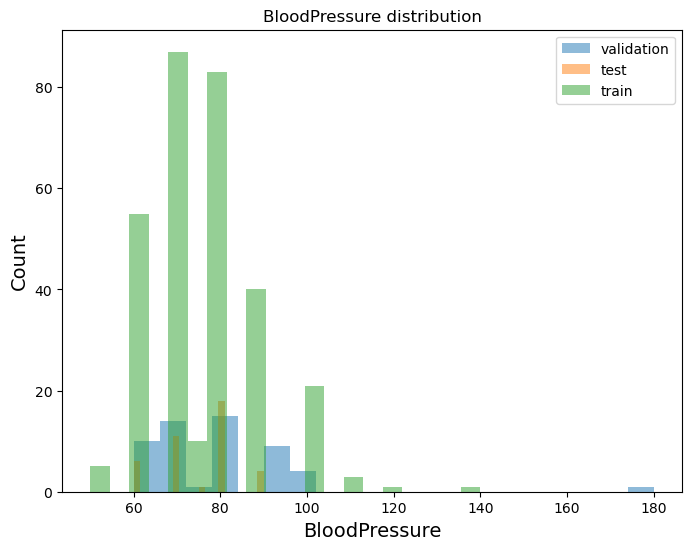

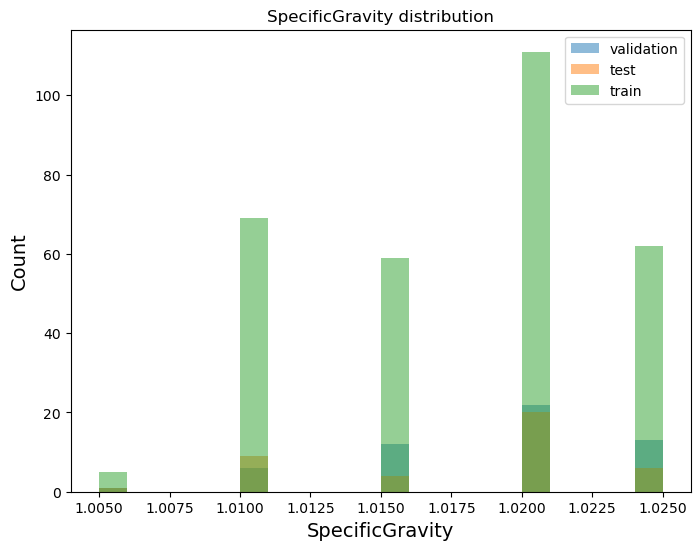

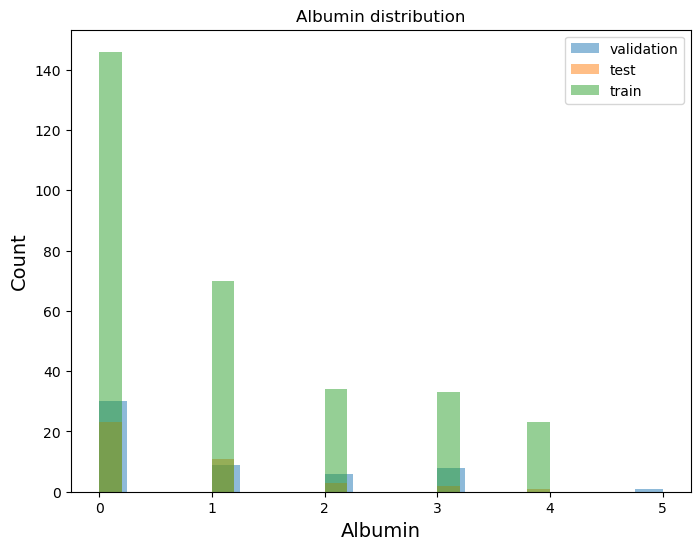

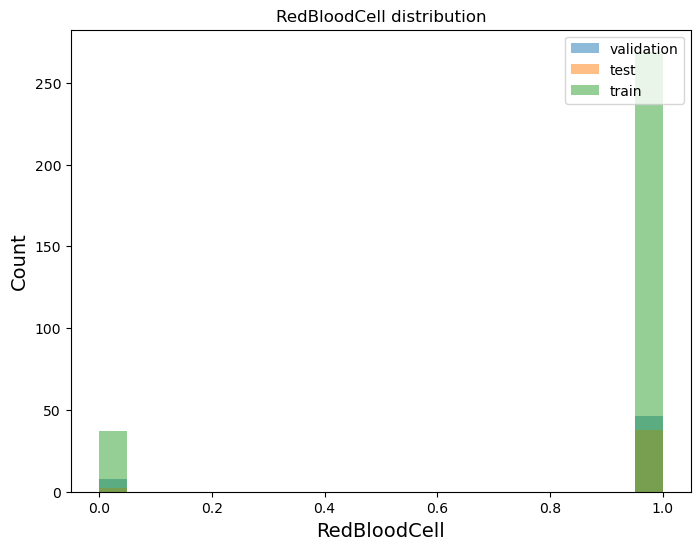

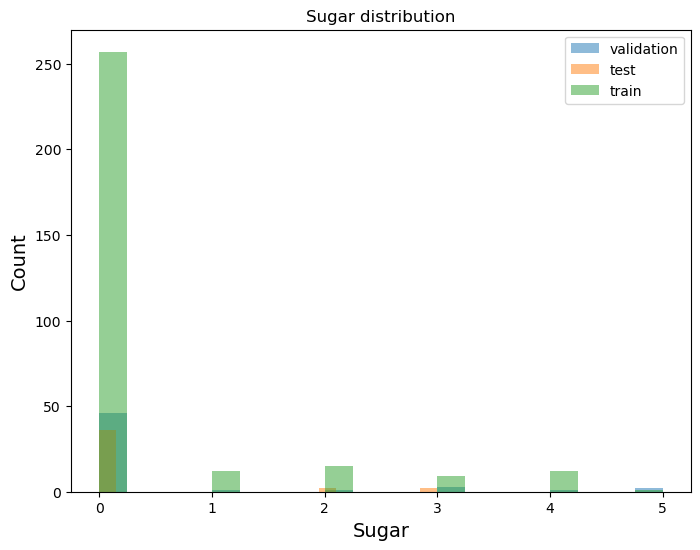

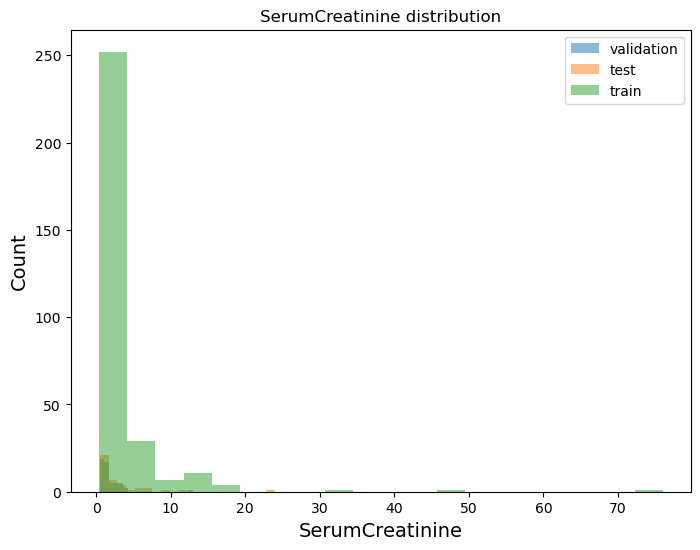

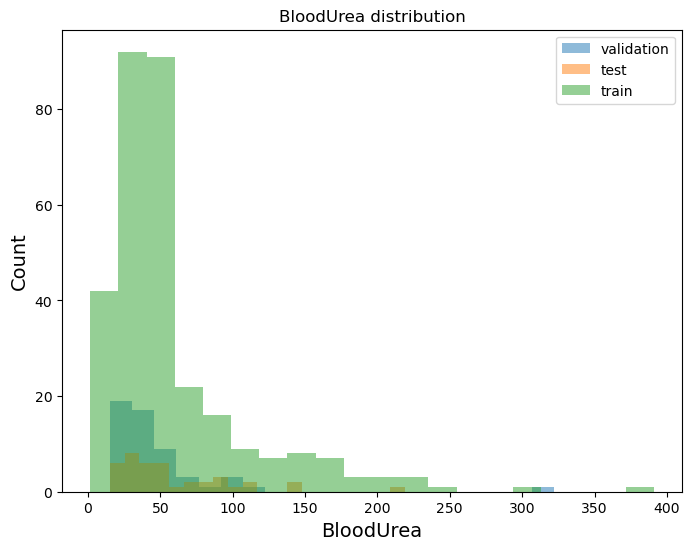

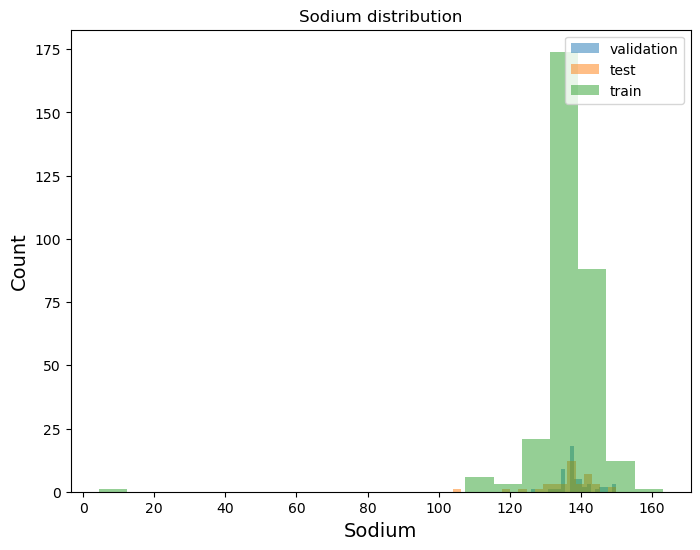

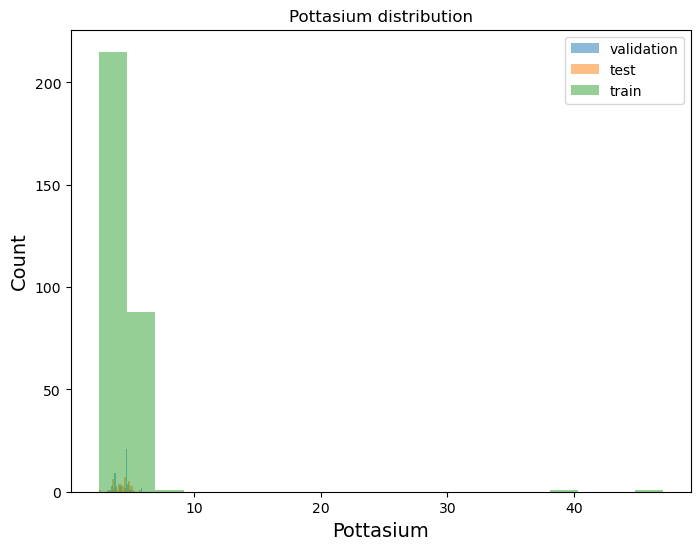

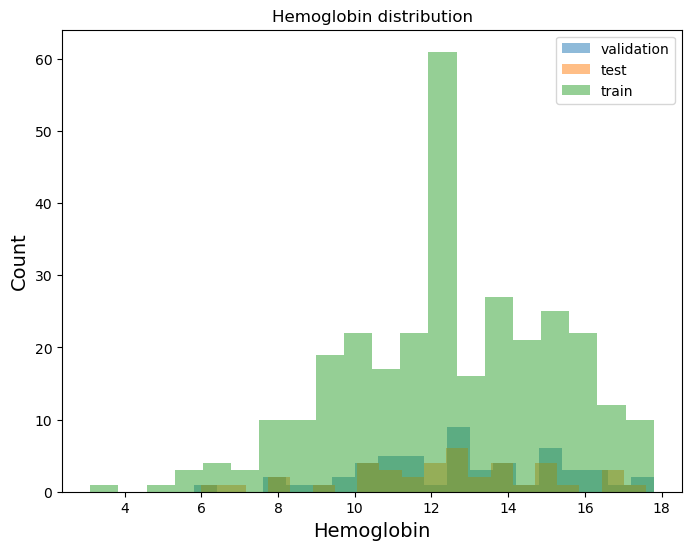

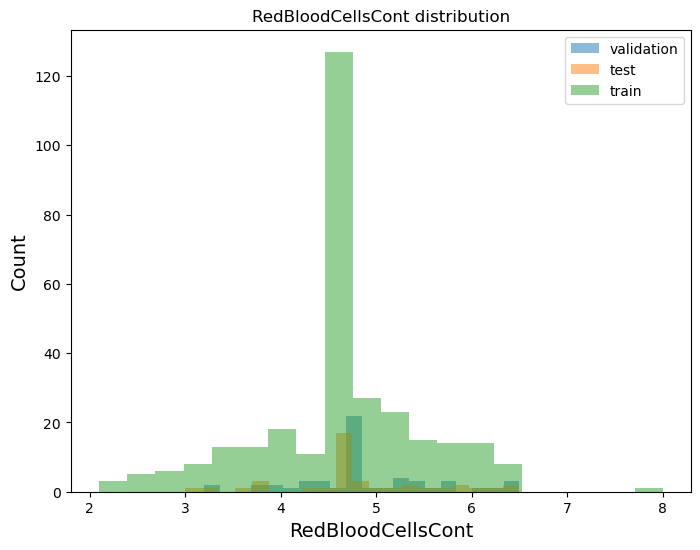

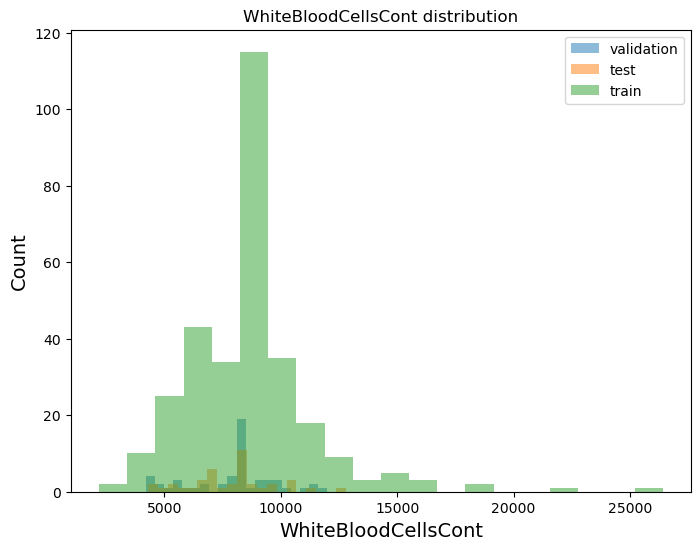

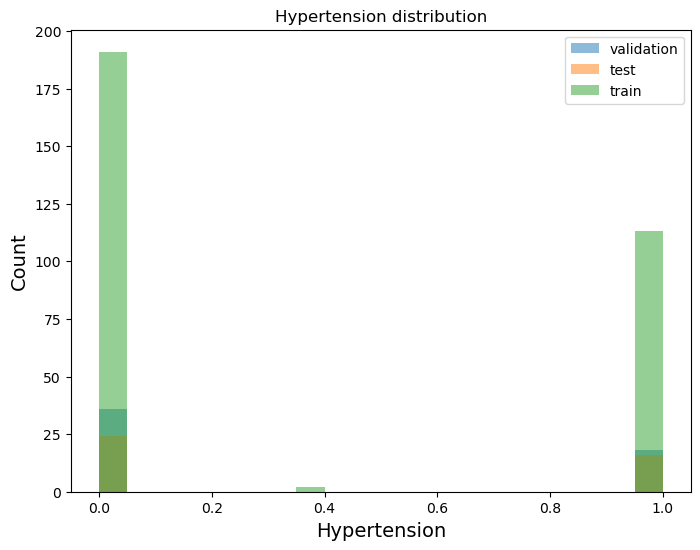

In [355]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['BloodPressure','SpecificGravity','Albumin','RedBloodCell','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']]


X_val_plot = X_val[['BloodPressure','SpecificGravity','Albumin','RedBloodCell','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']]


X_train_plot = X_train[['BloodPressure','SpecificGravity','Albumin','RedBloodCell','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']]


# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()


### Observations:

The division of dataset in Test, train and validation sets appears to be distributed correctly for all the variables except for Sodium, Pottasium, SeriumCreatanine, Albumin

# Method 3 - Using Gradient Boosting Classifier Results

Text(0.5, 1.0, 'Feature Importance ')

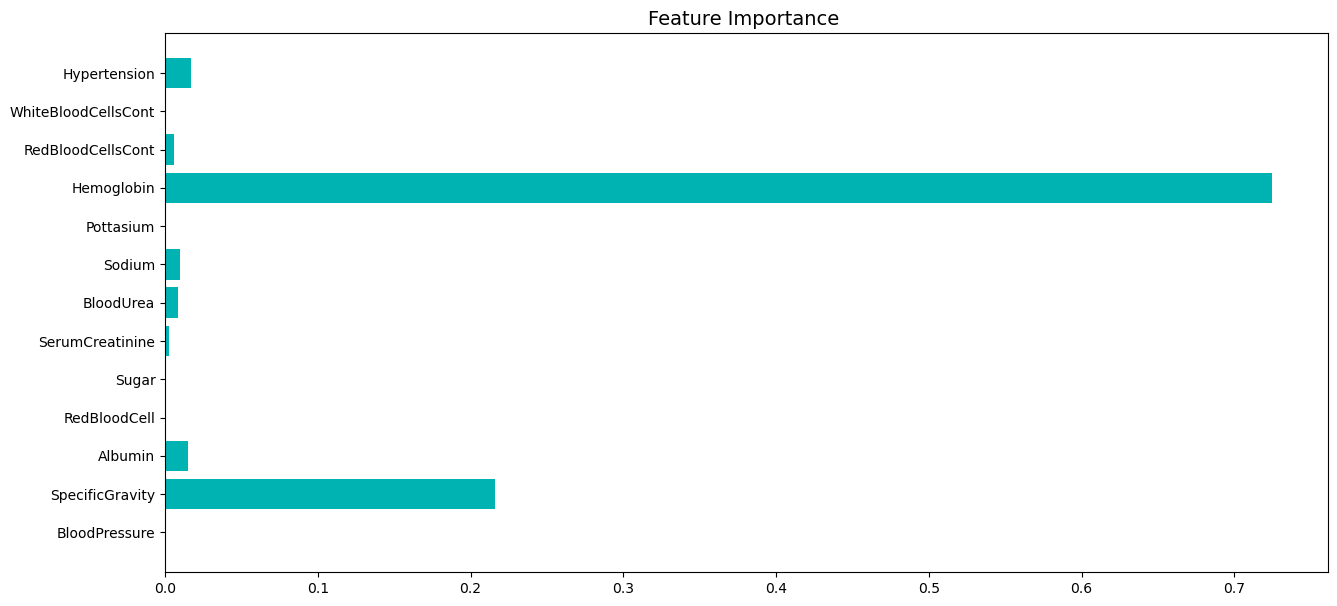

In [356]:
# Using Gradient Boosting Classifier Results

from sklearn import ensemble
model_3=ensemble.GradientBoostingClassifier()
model_3.fit(X_train,y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_3.feature_importances_, color ="#00b3b3")
plt.title('Feature Importance ', size=14)

### Observations:

Using gradient boosting method also we get similar results as the previous two methods with our numerical columns(Specific Gravity,Albumin,Blood Urea,Hemoglobin,Hypertension) having noticable significance.

# Outliers Detection and Removal

The __IQR (Interquartile Range)__ technique is a method used to detect and remove outliers in a dataset. The IQR is calculated as the difference between the 75th and 25th percentile of the data. Outliers are defined as observations that lie outside of 1.5 times the IQR below the 25th percentile or above the 75th percentile. The values that fall outside this range can be removed or further analyzed to determine if they should be kept in the dataset.

In [357]:
# calculates the 25th percentile of the data, represented by the 0.25 quantile
Q1 = X_train.quantile(0.25)
#calculates the 75th percentile of the data, represented by the 0.75 quantile
Q3 = X_train.quantile(0.75)
#calculates the IQR by subtracting the 25th percentile (Q1) from the 75th percentile (Q3)
IQR = Q3 - Q1
print(IQR)


BloodPressure            10.000
SpecificGravity           0.005
Albumin                   2.000
RedBloodCell              0.000
Sugar                     0.000
SerumCreatinine           2.170
BloodUrea                37.750
Sodium                    6.000
Pottasium                 0.900
Hemoglobin                3.750
RedBloodCellsCont         0.575
WhiteBloodCellsCont    2475.000
Hypertension              1.000
dtype: float64


In [358]:
# Removing outliers from dataset
X_Train = X_train[~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
X_Train.shape

(152, 13)

# Linear Regression Model

In [359]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [360]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)


LinearRegression()

In [361]:
# Create linear regression object
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()
# Train the model using the training sets
regr.fit(X_train,y_train)
print('Training accuracy : ',regr.score(X_train,y_train)*100)
print('Test accuracy : ',regr.score(X_test,y_test)*100)

Training accuracy :  95.75163398692811
Test accuracy :  92.5


The above code trains a logistic regression model on the training dataset and evaluates its performance on test dataset by measuring the accuracy of the model.Here output shows tarining and testing accuracy

In [362]:
y_pred=model.predict(X_test)
y_pred

398    0.226467
125    0.767839
328    0.369460
339    0.369762
172    0.761025
342    0.133120
197    1.199875
291    0.225192
29     0.560261
284    0.048579
174    0.556030
372    0.213242
188    0.546973
324    0.495825
321    0.321436
227    0.754982
371   -0.031531
5      0.946217
78     0.857853
223    0.780742
122    1.047880
242    1.410728
382    0.052524
214    0.331851
17     0.705710
92     1.006376
366    0.308975
201    1.028432
361    0.329578
207    0.657410
81     1.126939
4      0.723319
165    0.568597
275    0.151190
6      0.604488
80     0.757056
58     0.909357
102    0.301693
397    0.181842
139    0.864704
dtype: float64

### Making Predictions

In [363]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)


Mean squared error: 0.04
Coefficient of determination: 0.82
R^2 score on tarining set = 0.8175982392590215


In [364]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.07
Coefficient of determination: 0.68
R^2 score on test set = 0.6799999999999999


In [365]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.04
Coefficient of determination: 0.85
R^2 score on validation set = 0.8465909090909091


### Obeservations:

Above peice of  code is using the predictions made by the model on the training data, X_train, to evaluate its performance

The mean squared error (MSE) which is a measure of the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

The coefficient of determination (R^2) which is a measure of how well the model explains the variation in the data.

An R^2 of 1 indicates a perfect fit, while an R^2 of 0 indicates the model does not explain any of the variation in the data.

# Understanding the important features 

In [366]:

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2050 ± 0.1281,Hemoglobin
0.1000 ± 0.0316,SerumCreatinine
0.0250 ± 0.0316,BloodUrea
0.0200 ± 0.0200,RedBloodCellsCont
0.0150 ± 0.0400,BloodPressure
0.0000 ± 0.0316,Albumin
0 ± 0.0000,Hypertension
0 ± 0.0000,WhiteBloodCellsCont
0 ± 0.0000,Pottasium
0 ± 0.0000,Sodium


### Observations:
The feature importance score represents how much each feature is contributing to the predictions of the model. The higher the importance score, the more significant the feature is in making predictions.

In this output, Hemoglobin has the highest importance score of 0.2050 which means it is the most significant feature in making predictions. It is followed by SerumCreatanine with an importance score of 0.1000. Hypertension is third highest in terms of importance score. These features are considered as the most important predictors of the model.

Features with higher importance scores contribute more to the model's performance than those with lower scores.

This output can helps to identify which features are important in making predictions and which features can be removed to improve the model's performance.

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?

In [367]:
percent=[0.01,0.05,0.1]
train_data = data.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)
    
#creating new dataframe with 1%,5% and 10% missing values    
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN

Adding missing values to the original dataframe 'train_data' by randomly selecting a percentage of rows and columns (1%, 5%, and 10%) and replacing the values in those rows and columns with NaN.

Defining the percentages of missing values that will be added to the dataframe in the "percent" list (1%, 5%, and 10%). 

Creating three empty lists (all_rows, all_cols) to store the randomly selected rows and columns that will have missing values. For each percentage in "percent", it calculates the number of rows (nan_rows_size) that need to have missing values by multiplying the percentage by the number of rows in the dataframe.

Next, it uses the numpy random.choice() function to randomly select the same number of columns and rows as the number of missing values calculated earlier. These selected rows and columns are then added to the all_rows and all_cols lists respectively.

Finally,creating three new dataframes with missing values: predictors_missing_1_percent, predictors_missing_5_percent, predictors_missing_10_percent. It copies the original dataframe and then uses a for loop to replace the values of the rows and columns selected earlier with NaN in each of the new dataframes.






In [368]:
#Printing missing values
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)

Number of missing values
1% missing 4
5% missing 20
10% missing 40


,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCell,BloodUrea,SerumCreatinine,Sodium,Pottasium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont,Hypertension,ChronicKidneyDisease
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1.0
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1.0
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1.0
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1.0
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1.0


In [369]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         396 non-null    float64
 1   SpecificGravity       396 non-null    float64
 2   Albumin               396 non-null    float64
 3   Sugar                 396 non-null    float64
 4   RedBloodCell          396 non-null    float64
 5   BloodUrea             396 non-null    float64
 6   SerumCreatinine       396 non-null    float64
 7   Sodium                396 non-null    float64
 8   Pottasium             396 non-null    float64
 9   Hemoglobin            396 non-null    float64
 10  WhiteBloodCellsCont   396 non-null    float64
 11  RedBloodCellsCont     396 non-null    float64
 12  Hypertension          396 non-null    float64
 13  ChronicKidneyDisease  396 non-null    float64
dtypes: float64(14)
memory usage: 46.4 KB


Here we are dropping all the rows from the newly created dataframes with missing values that contain NaN values. It creates new dataframes, called "df_1_percent_without_nan", "df_5_percent_without_nan", and "df_10_percent_without_nan", which do not contain any rows with NaN values. These dataframes are created by using the "dropna()" function on the dataframes "predictors_missing_1_percent", "predictors_missing_5_percent", and "predictors_missing_10_percent", respectively.

Here we are creating new dataframes with the same data as the original dataframe, but with 1%, 5% and 10% of the data points replaced with NaN values. The original dataframe is copied using the copy() method, and then values are set to NaN using the at method of the dataframe.

Then, it is creating new dataframe with dropped na values from the above created dataframe with missing values. For example, df_1_percent_without_nan is created by dropping the NaN values from the predictors_missing_1_percent dataframe. The info() method is then used to display information about the dataframe, such as the number of non-null values in each column.

In [370]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm

# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

# Imputation Method 1 : Impute Numerical values with Median and Categorical value with Mode

In [371]:
num_cols=['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']

cat_cols=['ChronicKidneyDisease']

predict_impute_1=pd.DataFrame()
predict_impute_5=pd.DataFrame()
predict_impute_10=pd.DataFrame()
for col in num_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())
for col in cat_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_1_percent[col].mode())

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

# Calculating Accuracy and Confusion Matrix

In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

In [ ]:
model_firssthand_accuracy = 0.96
np.random.seed(0)
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

### Observations:

After doing median and mode imputation of missing values, here also we see that the accuracy keeps decreasing from 1% to 5% and then increases after more data imputation
Our dataset orginally has less rows and drop in accuracy means we are loosing on a lot of valuable information


# Imputation Method 2 : Impute using KNN imputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=2)
predict_impute_1 = predict_impute_1.dropna()
predict_impute_5 = predict_impute_5.dropna()
predict_impute_10 = predict_impute_10.dropna()

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))


In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


In [ ]:
model_firssthand_accuracy = 0.97
np.random.seed(0)
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

This code is generating a plot of accuracy versus the percentage of data imputation using the plt.plot() function from the matplotlib library. The plot is created using the accuracy variable, which is a list containing the accuracy for no data imputation and different levels of data imputation (1%, 5%, 10%). The label variable is a list of strings that are used as the x-axis labels. 

### Observations:

With this technique, we first observe that accuracy is constant after 1% data imputation
Accuracy decreases from 5% to 10 % imputation  
The accuracy for all the imputation techniques is less than the base model's accuracy

#  Imputation Method 3 : MICE Imputation technique

In [ ]:
!pip install fancyimpute
#from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer as MICE
import pandas as pd


# create a copy of the original dataframe with missing values
df_missing = predictors
df_missing.iloc[2:5,3:6] = np.nan

# create an imputer object
imputer = MICE()

# fit the imputer on the data
imputer.fit(predictors)

#MICE().fit_transform(df)


# perform the imputation
df_imputed = imputer.transform(predictors)

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


In [ ]:

np.random.seed(0)
model_firssthand_accuracy = 0.97
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

### Observations:

With this technique, we first observe a decrease  in accuracy after 1% data imputation
There is a significant increase in accuracy after 5% data imputation 
The accuracy for all the imputation techniques is less than the base model's accuracy

___Note___: The imputation graphs may change every time you run the code due to the randomness involved in the imputation methods.

## Citations
1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks
Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown
Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow
Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization
Link - https://seaborn.pydata.org

4.How to Identify the Most Important Predictor Variables in Regression Models https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa

5.Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

6.MICE Imputation Technique
https://stackoverflow.com/questions/54059964/can-not-use-mice-from-fancyimputer-python




## Licensing
Copyright 2023 Akshatha Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.